In [13]:
import tensorflow as tf
from tensorflow import keras

from logic.dataset import Dataset
from logic.model import create_model

In [14]:
model = create_model("multiinput_multioutput")
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))


In [15]:
train_filepath = "../data/train.csv"
valid_filepath = "../data/valid.csv"
test_filepath = "../data/test.csv"

In [16]:
train_set = Dataset.csv_to_np_dataset(train_filepath)
valid_set = Dataset.csv_to_np_dataset(valid_filepath)
test_set = Dataset.csv_to_np_dataset(test_filepath)

In [17]:
print(f"X_train.dtype: {train_set.dtype}")
print(f"X_train.shape: {train_set.shape}")

X_train.dtype: float64
X_train.shape: (11610, 9)


In [18]:
X_train_A, X_train_B = train_set[:,:5], train_set[:,2:-1]
y_train = train_set[:,-1]
X_valid_A, X_valid_B = valid_set[:,:5], valid_set[:,2:-1]
y_valid = valid_set[:,-1]
X_test_A, X_test_B = test_set[:,:5], test_set[:, 2:-1]
y_test = test_set[:,-1]

In [19]:
batch_size = 32
len_train = sum([1 for _ in open('../data/train.csv')])

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
360/363 [============================>.] - ETA: 0s - loss: 3.2507 - output_loss: 2.9736 - aux_output_loss: 5.7452WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x176a1f040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linu

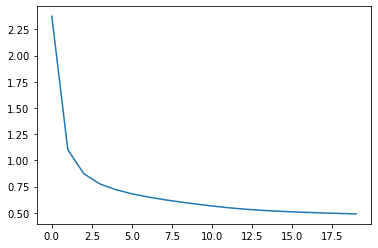

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])

In [21]:
model = create_model("singleinput_singleoutput")
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [22]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_valid = valid_set[:,:-1]
y_valid = valid_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]


In [23]:
batch_size = 32
len_train = sum([1 for _ in open('../data/train.csv')])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
loss = model.evaluate(X_test, y_test)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
176/363 [=============>................] - ETA: 0s - loss: 3.4070 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16c898280> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach 

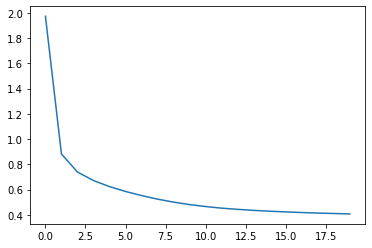

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])